In [1]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
import symreg
from gpbenchmarks import get_data

from experiment_settings import nguyen7_funset, pagie_funset, keijzer_funset, korns12_funset, vlad_funset


In [2]:
kw_params = {'real_valued': True, 'max_back': 20}

params_nguyen7 = tengp.Parameters(2, 1, 1, 50, nguyen7_funset, **kw_params)
params_pagie1  = tengp.Parameters(2, 1, 1, 50, pagie_funset, **kw_params)
params_keijzer6 = tengp.Parameters(2, 1, 1, 50, keijzer_funset, **kw_params)
params_korns = tengp.Parameters(6, 1, 1, 50, korns12_funset, **kw_params)
params_vlad = tengp.Parameters(6, 1, 1, 50, vlad_funset, **kw_params)

In [3]:
import random 

data = [
    ('nguyen7', symreg.get_benchmark_nguyen7(random, None), params_nguyen7),
    ('pagie1', symreg.get_benchmark_pagie1(random, None), params_pagie1),
    ('keijzer6', symreg.get_benchmark_keijzer(random, 6), params_keijzer6),
    ('korns12', symreg.get_benchmark_korns(random, 12), params_korns),
    ('vladislasleva4', symreg.get_benchmark_vladislasleva4(random, None), params_vlad)
]

In [4]:
%%time
results = []
champions = []


for name, (x_train, y_train, x_test, y_test), params in data:
    print(name)
    bounds = tengp.individual.IndividualBuilder(params).create().bounds[:]
    
    x_train = np.c_[x_train, np.ones(len(x_train))]
    
    problem_results = []
    random.seed(42)
    for i in range(100):
        print(i, end=',')
        
        res = tengp.simple_es(x_train, y_train, mean_squared_error, params, mutation='single', evaluations=10000)
               
        problem_results.append(res[0].fitness)
    results.append(problem_results)

nguyen7
0,

/home/jarino/dev/cgp-optimization/experiment_settings.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/home/jarino/dev/tensor-cgp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in multiply
  u = a*f_u(L, U)
/home/jarino/dev/cgp-optimization/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)


1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,pagie1
0,

/home/jarino/dev/cgp-optimization/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/home/jarino/dev/tensor-cgp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in power
  l = (1-a)*f_l(L, U)
/home/jarino/dev/tensor-cgp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in power
  u = a*f_u(L, U)
/home/jarino/dev/cgp-optimization/experiment_settings.py:41: RuntimeWarning: divide by zero encountered in reciprocal
  return x**(-1)
/home/jarino/dev/tensor-cgp/tengp/individual.py:102: RuntimeWarning: overflow encountered in power
  l = (1-a)*f_l(L, U)
/home/jarino/dev/tensor-cgp/tengp/individual.py:103: RuntimeWarning: overflow encountered in power
  u = a*f_u(L, U)
/home/jarino/dev/tensor-cgp/tengp/individual.py:102: RuntimeWarning: divide by zero encountered in power
  l = (1-a)*f_l(L, U)
/home/jarino/dev/tensor-cgp/tengp/individual.py:103: RuntimeWarning: divide by zero encountered in power
  u = a*f_u(L, 

1,2,3,4,5,6,7,

/home/jarino/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


8,9,10,11,12,13,14,15,

/home/jarino/dev/tensor-cgp/tengp/individual.py:102: RuntimeWarning: overflow encountered in add
  l = (1-a)*f_l(L, U)
/home/jarino/dev/tensor-cgp/tengp/individual.py:103: RuntimeWarning: overflow encountered in add
  u = a*f_u(L, U)


16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,

/home/jarino/dev/tensor-cgp/tengp/individual.py:102: RuntimeWarning: overflow encountered in subtract
  l = (1-a)*f_l(L, U)
/home/jarino/dev/tensor-cgp/tengp/individual.py:103: RuntimeWarning: overflow encountered in subtract
  u = a*f_u(L, U)


35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


94,95,96,97,98,99,keijzer6
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,korns12
0,

/home/jarino/dev/cgp-optimization/experiment_settings.py:38: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/jarino/dev/cgp-optimization/experiment_settings.py:26: RuntimeWarning: overflow encountered in power
  return x**3
/home/jarino/dev/cgp-optimization/experiment_settings.py:23: RuntimeWarning: overflow encountered in square
  return x**2


1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,vladislasleva4
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,CPU times: user 3h 24min 57s, sys: 15.7 s, total: 3h 25min 13s
Wall time: 3h 25min 12s


In [5]:
def plot_results(name, outs):
    print(name)
    costs = np.array(outs)
    print('min:', np.min(costs))
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    plt.figure()
    plt.title(name)
    sns.distplot(costs, kde=False);
    

nguyen7
min: 5.807071877042386e-30
mean: 0.03991506614107995
median: 0.0016296175787529415
variance: 0.01661768012933373
pagie1
min: 0.004568790652671019
mean: 0.2039559425662057
median: 0.20036282206040112
variance: 0.011635853907185587
keijzer6
min: 2.2215995234161183e-05
mean: 0.038720253769208936
median: 0.00805534584148324
variance: 0.012786353947584048
korns12
min: 1.0952621461167165
mean: 1.098264069814499
median:

/home/jarino/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


 1.0977542657233872
variance: 6.017960721313813e-06
vladislasleva4
min: 0.021174487454868572
mean: 0.03387497145572392
median: 0.034050330884394846
variance: 1.696702092376784e-05


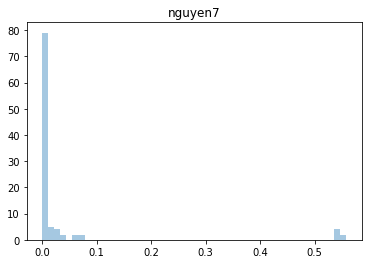

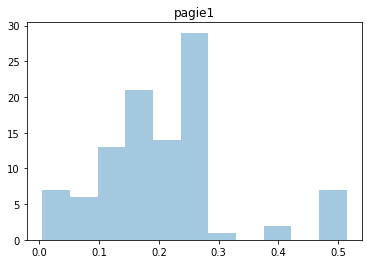

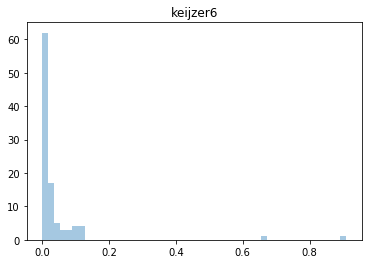

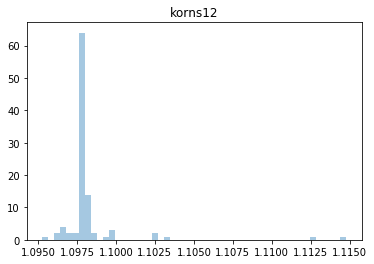

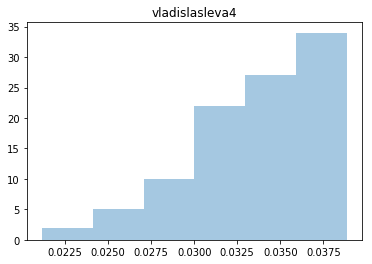

In [7]:
%matplotlib inline

for d, result in zip(data, results):
    plot_results(d[0], result)